# Developer Tools / Laplacian Spectra
$$
\newcommand{\sign}{\operatorname{sign}}
% \newcommand{\ket}[1]{\left| #1 \right\rangle}
$$

In [1]:
%matplotlib inline

from lrgsglib.core import *

In [2]:
move_to_rootf()
#
plt.style.use('ipynb/nb_plotsheet.mplstyle')

Current working directory: /home/opisthofulax/PhD/projects/complex-networks/lrgsglib


## Lattice 2D


### Giant Cluster size distribution $P(S_{\mathrm{GC}})$ in $\sign(\ket{\lambda_i})$

In [32]:
side = 64
pflipList = np.linspace(0.01, 0.5, 10)
geo = 'squared'
cell = 'rand'
which = 0
navg = 100

In [33]:
lenList = {}
for pflip in pflipList:
    print(pflip)
    lenList[pflip] = []
    for _ in range(navg):
        l = Lattice2D(side, geo, pflip=pflip, init_nw_dict=True)
        l.flip_sel_edges(l.nwDict[cell]['G'])
        l.compute_k_eigvV(howmany=which + 1)
        l.load_eigV_on_g(which=which, binarize=True)
        lenList[pflip].append(len(l.compute_gc(f'eigV{which}', +1)))

0.01
0.06444444444444444


KeyboardInterrupt: 

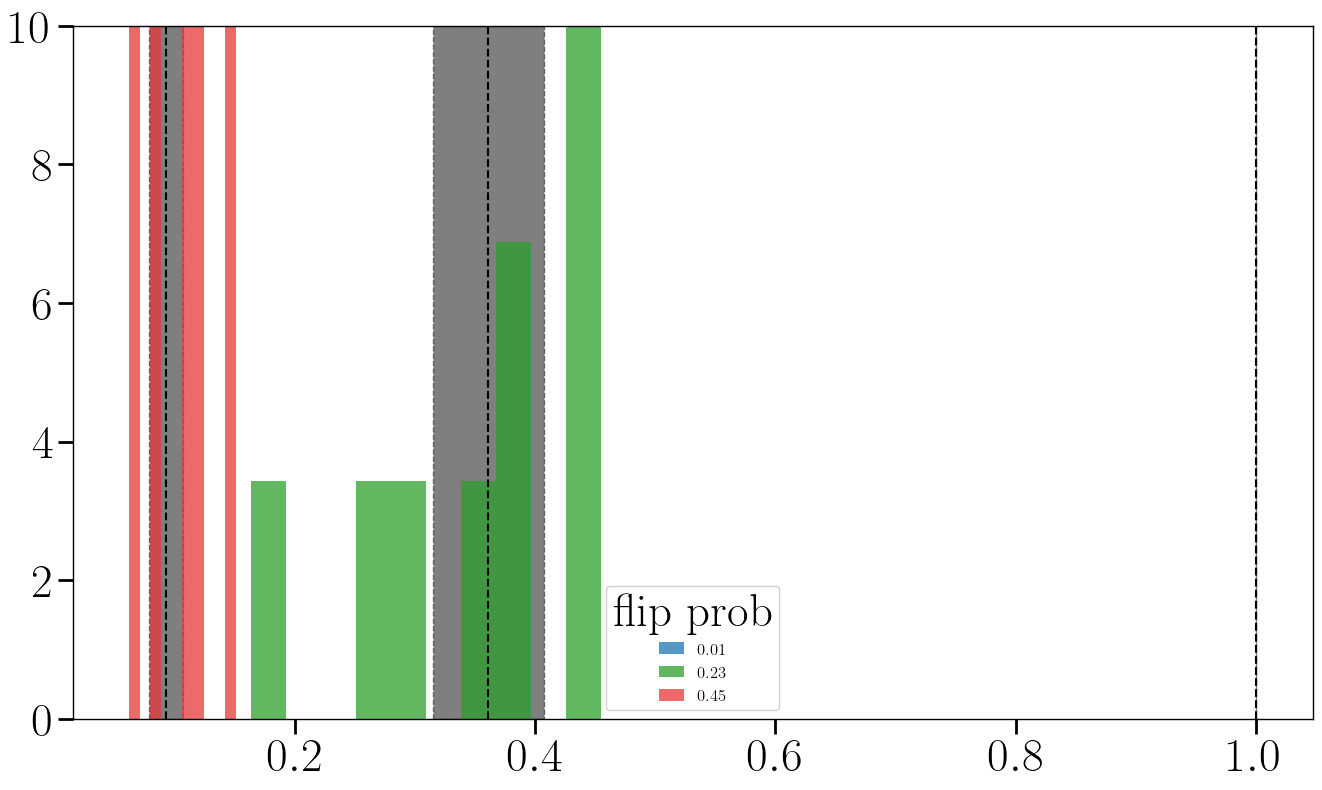

In [29]:
for pflip in pflipList[::4]:
    plt.hist(np.array(lenList[pflip])/l.N, label=f'{pflip:.2f}', alpha=0.75, density=True)
    mean = np.mean(lenList[pflip])/l.N
    std = np.std(lenList[pflip])/l.N/2
    plt.axvline(mean, color='k', ls='--')
    plt.axvspan(mean-std, mean+std, color='k', ls='--', alpha=0.5, zorder=-1)
plt.ylim(0, 10)
plt.legend(title='flip prob')

## Miscellanea

### Single errors eigenvector

In [ ]:
sizes = 2**np.arange(3, 5)
verbose = False
#
gcIterProd = product(['squared', 'tri', 'hex'], 
                     ['single', 'singleZERR', 'singleXERR'])
for geometry, cell in gcIterProd:
        conditional_print(f"{geometry}, {cell}...\n\t", verbose, end=' ')
        lattices = {}
        #
        for side in sizes:
            lattices[side] = Lattice2D(#
                side1 = side,
                geo = geometry,
                init_nw_dict = True,
                sgpath='test_data', 
            )
            lattices[side].flip_sel_edges(
                lattices[side].nwDict[cell]['G']
            )
        #
        eigvpath = f"{lattices[side].lrgsgpath}eigV0_{cell}.npy"
        #
        if os.path.exists(eigvpath):
            conditional_print("File already exists.", verbose)
            continue
        else:
            conditional_print("computing... ", verbose)
            lattices[side].compute_k_eigvV()
            with open(eigvpath, 'wb') as f:
                np.save(f, np.abs(lattices[side].eigV))
            conditional_print("done.", verbose)

### No flip Signed Laplacian eigenvectors of a Squared Lattice

In [ ]:
side = 50
geo = 'squared'
pbc = True
Neigv = 10
selEigv = 0
pflip = 0.08

In [ ]:
l = Lattice2D(side, geo=geo, pbc=pbc, pflip=pflip)
l.flip_random_fract_edges()
l.compute_k_eigvV(howmany=Neigv)
eigV = np.sign(l.eigV).reshape(Neigv, side, side)

In [ ]:
fig, ax = plt.subplots(ncols=Neigv, figsize=(Neigv*5, 5))
for i,axi in enumerate(ax):
    axi.imshow(eigV[i], cmap='hot', interpolation=None)